In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from mpl_toolkits.basemap import Basemap
%matplotlib inline

Links to datasets
SAT Results: https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4
School Attendance and Enrollment Statistics by District (2010-11): https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt
2010-2011 Class Size:https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3
AP (College Board) 2010 School Level Results:https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e
Graduation Outcomes - Classes Of 2005-2010:https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a
School Demographics and Accountability Snapshot 2006-2012:https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j
NYC School Survey - 2011:https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8

In [5]:
cd

/Users/MJ


In [6]:
cd ipython_files/dataquest/

/Users/MJ/ipython_files/dataquest


In [7]:
ls

data/      notebooks/


In [8]:
cd data/

/Users/MJ/ipython_files/dataquest/data


In [9]:
ls

2011 data files online/
2011datafilesonline.zip
School_Attendance_and_Enrollment_Statistics_by_District__2010-11_.csv
airlines.csv
airports.csv
ap_2010.csv
class_size.csv
demographics.csv
fandango_score_comparison.csv
fandango_scrape.csv
graduation.csv
hs_directory.csv
recent-grads.csv
recent-grads_2.csv
routes.csv
sat_results.csv
survey_all.txt
survey_d75.txt
train.csv


In [10]:
data = {}

In [13]:
data = {"ap_2010": pd.read_csv("ap_2010.csv"), "class_size": pd.read_csv("class_size.csv"), "demographics": pd.read_csv("demographics.csv"), "graduation": 
        pd.read_csv("graduation.csv"), "hs_directory": pd.read_csv("hs_directory.csv"), "sat_results": pd.read_csv("sat_results.csv")}

In [14]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [15]:
for i in data:
    print(data[i].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [16]:
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding="windows-1252")
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding="windows-1252")

survey = pd.concat([all_survey, d75_survey], axis=0)

In [17]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


need to filter out columns that are not needed in the survey df. 

relevent colums =

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [18]:
survey.shape

(1702, 2773)

In [19]:
survey["DBN"] = survey["dbn"]

new_columns = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", 
               "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", 
               "eng_tot_11", "aca_tot_11"]

survey = survey.loc[:,new_columns]
data["survey"] = survey
data["survey"].shape

(1702, 23)

As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the pandas pandas.DataFrame.apply() method, along with a custom function that:

Takes in a number.
Converts the number to a string using the str() function.
Check the length of the string using the len() function.
If the string is two digits long, returns the string.
If the string is one digit long, adds a 0 to the front of the string, then returns it.
You can use the string method zfill() to do this.
Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. Here's an example of how we would do this:

Successfully conbined below

In [20]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [21]:
data["hs_directory"].columns

Index([u'dbn', u'school_name', u'boro', u'building_code', u'phone_number',
       u'fax_number', u'grade_span_min', u'grade_span_max',
       u'expgrade_span_min', u'expgrade_span_max', u'bus', u'subway',
       u'primary_address_line_1', u'city', u'state_code', u'zip', u'website',
       u'total_students', u'campus_name', u'school_type',
       u'overview_paragraph', u'program_highlights', u'language_classes',
       u'advancedplacement_courses', u'online_ap_courses',
       u'online_language_courses', u'extracurricular_activities',
       u'psal_sports_boys', u'psal_sports_girls', u'psal_sports_coed',
       u'school_sports', u'partner_cbo', u'partner_hospital',
       u'partner_highered', u'partner_cultural', u'partner_nonprofit',
       u'partner_corporate', u'partner_financial', u'partner_other',
       u'addtl_info1', u'addtl_info2', u'start_time', u'end_time',
       u'se_services', u'ell_programs', u'school_accessibility_description',
       u'number_programs', u'priority01', u

In [22]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [23]:
def csd_changer(string):
    string = str(string)
    if len(string) == 1:
        string = string.zfill(2)
    return string    

In [24]:
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(csd_changer)

In [25]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01


In [26]:
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [27]:
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


Need to add individual SAT scores together to get the aggregate score, see below

In [28]:
data["sat_results"]["SAT Math Avg. Score"][0:5]

0    404
1    423
2    402
3    401
4    433
Name: SAT Math Avg. Score, dtype: object

In [29]:
data["sat_results"]["SAT Math Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"],errors="coerce")
data["sat_results"]["SAT Critical Reading Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"], errors="coerce")
data["sat_results"]["SAT Writing Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"], errors="coerce")

In [30]:
data["sat_results"]["sat_score"] = data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]
print(data["sat_results"]["sat_score"][0:5])

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


In [31]:
data["hs_directory"].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680


In [32]:
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")

['(40.8276026690005, -73.90447525699966)']

Need to extract the latitude from the address found in HS Directory

In [33]:
def extract_lat_long(lat_long):
    string = re.findall("\(.+\)", lat_long)
    string = string[0].replace("(", "")
    string = string.split(",")
    return(string[0])

In [34]:
lat = data["hs_directory"]["Location 1"].apply(extract_lat_long)
data["hs_directory"]["lat"] = lat

Similar to above, extracting longitude and chaning columns into numeric

In [35]:
def extract_lat_long(lat_long):
    string = re.findall("\(.+\)", lat_long)
    string = string[0]
    string = string.split(",")
    string = string[1].replace(")", "")
    return(string)

In [36]:
long = data["hs_directory"]["Location 1"].apply(extract_lat_long)
data["hs_directory"]["lon"] = long

In [37]:
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"],errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"],errors="coerce")

In [38]:
data["class_size"].columns

Index([u'CSD', u'BOROUGH', u'SCHOOL CODE', u'SCHOOL NAME', u'GRADE ',
       u'PROGRAM TYPE', u'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       u'CORE COURSE (MS CORE and 9-12 ONLY)', u'SERVICE CATEGORY(K-9* ONLY)',
       u'NUMBER OF STUDENTS / SEATS FILLED', u'NUMBER OF SECTIONS',
       u'AVERAGE CLASS SIZE', u'SIZE OF SMALLEST CLASS',
       u'SIZE OF LARGEST CLASS', u'DATA SOURCE',
       u'SCHOOLWIDE PUPIL-TEACHER RATIO', u'padded_csd', u'DBN'],
      dtype='object')

In [39]:
data["class_size"]["PROGRAM TYPE"].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

In [40]:
class_size = data["class_size"]

In [41]:
type(class_size)

pandas.core.frame.DataFrame

In [42]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [43]:
class_size = data["class_size"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size = class_size[class_size["GRADE "] == "09-12"]

print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

In [44]:
grouped = class_size.groupby("DBN")
class_size = grouped.aggregate(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

In [45]:
print(data["class_size"][0:5])

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

In [46]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [47]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
print(data["graduation"][0:5])

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   
31           193             105                     54.4%                91   

   Total Regents - % of cohort Total Regents - % of grads  \
3            

...Need to conver the SAT scores into integers so that they can be added together. SEE RESULTS BELOW...

In [48]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for i in cols:
    data["ap_2010"][i] = pd.to_numeric(data["ap_2010"][i], errors="coerce")

print(data["ap_2010"][0:5])

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  


...Below I start to combine the datasets using the Pandas merge function...

Started with SAT Results because that's a dataset I do not want to compromise columns to use

In [49]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], how="left")
combined = combined.merge(data["graduation"], how="left")
combined.shape

(479, 33)

...Merging continues below using inner merge...


In [50]:
combined = combined.merge(data["class_size"], left_on = "DBN", right_on = "DBN", how = "inner")
combined = combined.merge(data["demographics"], left_on = "DBN", right_on = "DBN", how = "inner")
combined = combined.merge(data["survey"], left_on = "DBN", right_on = "DBN", how = "inner")
combined = combined.merge(data["hs_directory"], left_on = "DBN", right_on = "DBN", how = "inner")
combined.shape

(2337, 159)

...Below I will use the fill na fucntion to fill in NAs as the mean of the column. For those columns that don't have mean the NaN will be replaced with 0...

In [51]:
means = combined.mean()    

combined = combined.fillna(means)
combined = combined.fillna(0)
print(combined.head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
2  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
3  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
4  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     29                            355.0   
2                     29                            355.0   
3                     29                            355.0   
4                     29                            355.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score SchoolName  \
0                404.0                   363.0     1122.0          0   
1                404.0                   363.0     1122.0          0   
2                404.0                   363.0     1122.

...
...DATA HAS BEEN CLEANED AND IS READY FOR ANALYSIS BELOW...
...

In [52]:
combined.columns

Index([u'DBN', u'SCHOOL NAME', u'Num of SAT Test Takers',
       u'SAT Critical Reading Avg. Score', u'SAT Math Avg. Score',
       u'SAT Writing Avg. Score', u'sat_score', u'SchoolName',
       u'AP Test Takers ', u'Total Exams Taken',
       ...
       u'priority04', u'priority05', u'priority06', u'priority07',
       u'priority08', u'priority09', u'priority10', u'Location 1', u'lat',
       u'lon'],
      dtype='object', length=159)

...Need to pull out the first to two digits of the DBN number to get the school district, the function below does just that...

In [53]:
def extract_district(string):
    string = string[0:2]
    return string
combined["school_dist"] = combined["DBN"].apply(extract_district)

...Finding correlations amongest the dataset...

In [54]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986650
SAT Math Avg. Score                     0.972547
SAT Writing Avg. Score                  0.988028
sat_score                               1.000000
AP Test Takers                          0.530071
Total Exams Taken                       0.521245
Number of Exams with scores 3 4 or 5    0.469777
Total Cohort                            0.324017
CSD                                     0.048876
NUMBER OF STUDENTS / SEATS FILLED       0.396826
NUMBER OF SECTIONS                      0.365094
AVERAGE CLASS SIZE                      0.394882
SIZE OF SMALLEST CLASS                  0.265538
SIZE OF LARGEST CLASS                   0.322237
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                             -0.021153
frl_percent                            -0.455829
total_enrollment                        0.322227
ell_num                                -0.060752
ell_percent                            -0.349744
sped_num            

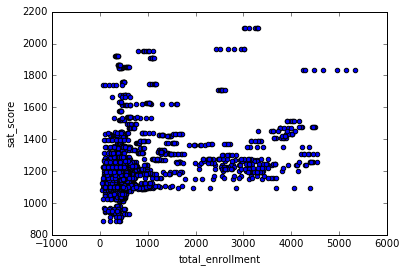

In [55]:
combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

No strong correlation presented in the chart above but something highly concentated in the bottom left. As such, I try to isolate the data points in the bottom left (below). 

In [56]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = combined[combined["sat_score"] < 1000]
print(low_enrollment["SCHOOL NAME"])

579               INTERNATIONAL COMMUNITY HIGH SCHOOL
580               INTERNATIONAL COMMUNITY HIGH SCHOOL
581               INTERNATIONAL COMMUNITY HIGH SCHOOL
582               INTERNATIONAL COMMUNITY HIGH SCHOOL
583               INTERNATIONAL COMMUNITY HIGH SCHOOL
584               INTERNATIONAL COMMUNITY HIGH SCHOOL
806               ACADEMY FOR LANGUAGE AND TECHNOLOGY
807               ACADEMY FOR LANGUAGE AND TECHNOLOGY
808               ACADEMY FOR LANGUAGE AND TECHNOLOGY
809               ACADEMY FOR LANGUAGE AND TECHNOLOGY
810               ACADEMY FOR LANGUAGE AND TECHNOLOGY
811                   BRONX INTERNATIONAL HIGH SCHOOL
812                   BRONX INTERNATIONAL HIGH SCHOOL
813                   BRONX INTERNATIONAL HIGH SCHOOL
814                   BRONX INTERNATIONAL HIGH SCHOOL
815                   BRONX INTERNATIONAL HIGH SCHOOL
816                   BRONX INTERNATIONAL HIGH SCHOOL
817                   BRONX INTERNATIONAL HIGH SCHOOL
902             KINGSBRIDGE 

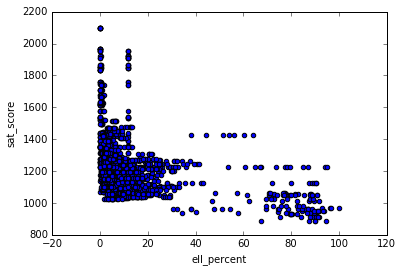

In [57]:
combined.plot.scatter(x="ell_percent", y="sat_score")
plt.show()

...Mapping of the schools with high numbers of English language learners...

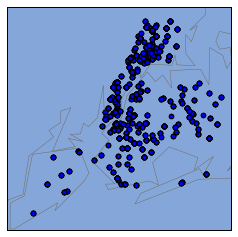

In [64]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

#had to convert the lat and lon columns in combined to lists in order to pass the variables to basemap
# pass lat and lon figures to the map in the form of a scatter plot BUT make sure to tell the map that these are lat 
#lon using the boolean statement laton=True

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

We can shade each point in the scatterplot by passing the keyword argument c into the scatter() method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers accordingly.

The method will convert the sequence of numbers we pass into the c keyword argument to values ranging from 0 to 1. It will then map these values onto a colormap. Matplotlib has quite a few default colormaps. In our case, we'll use the summer colormap, which results in green points for low numbers, and yellow points for high numbers.

For example, let's say we plotted ell_percent by school. If we pass in the keyword argument c=combined["ell_percent"], then the method would shade a school with a high ell_percent yellow, and a school with a low ell_percent green. We can specify the colormap we want to use by passing the cmap keyword argument to the scatter() method.

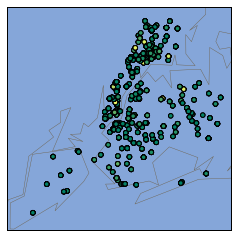

In [65]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()